**1. Judul & Deskripsi**

#  Cirrhosis Patient Survival Prediction
UTS Penambangan Data — Klasifikasi menggunakan Naive Bayes

**2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**3. Load dan Gabungkan Data**

In [2]:
data_raw = fetch_ucirepo(id=878)
X = data_raw.data.features
y = data_raw.data.targets
data = pd.concat([X, y], axis=1)


**4. Data Understanding**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

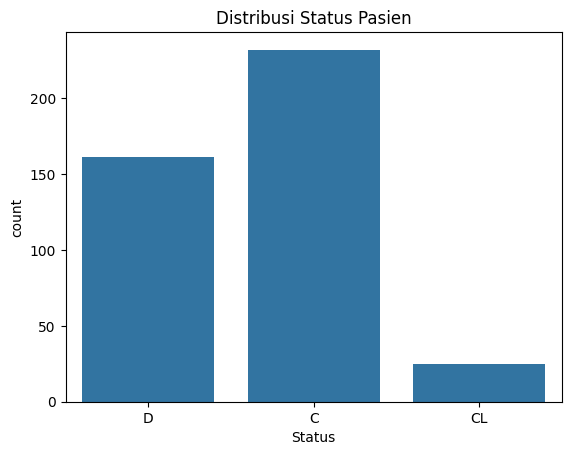

In [3]:
data.info()
data.describe()
data.isnull().sum()
sns.countplot(data=data, x='Status')
plt.title("Distribusi Status Pasien")
plt.show()


**5. Preprocessing**

In [4]:
# Isi missing values
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(include='object').columns

for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encoding
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Standardisasi
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


**6. Split Data**

In [5]:
X = data.drop(columns='Status')
y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**7. Modeling Naive Bayes**

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


**8. Evaluasi**

Accuracy: 0.5238095238095238

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.45      0.58        44
           1       0.09      0.75      0.16         4
           2       0.81      0.58      0.68        36

    accuracy                           0.52        84
   macro avg       0.57      0.60      0.47        84
weighted avg       0.77      0.52      0.60        84



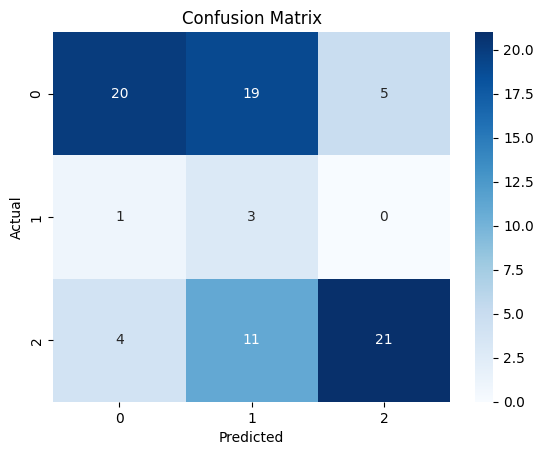

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
